# Getting data

Our titanic data can be found at this <a src='https://www.kaggle.com/datasets/marcpaulo/titanic-huge-dataset-1m-passengers'>link</a> [https://www.kaggle.com/datasets/marcpaulo/titanic-huge-dataset-1m-passengers]. This is a dataset that is enlarged to 1 million rows but still tries to keep the logic behind the normal titanic-datasets. As we will see later, the number of rows will be slimmed down a bit anyway.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

Here, we load our dataset. Since this notebook focuses on data exploration, we will use a pre-downloaded version of the dataset. If you'd like to learn how to obtain the dataset from Kaggle, we recommend reading the next notebook ([1_1_scrape_clean](./1_1_scrape_clean.ipynb)).

In [3]:
df = pd.read_csv("huge_1M_titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1310,1,1,"Name1310, Miss. Surname1310",female,NaN,0,0,SOTON/O2 3101272,76.760165,NaN,C
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C


# Visualisation Data
In this section, we will visualize the data that will be used in this project. Before that, however, we'll provide an explanation of the data we won't be using, as it either wouldn't contribute much or isn't particularly useful.

## Unused data

"We will not be using the 'PassengerId' as it does not provide any relevant information related to the actual Titanic events. The passengers' names will also be excluded, as they were added to the dataset to expand on the original Titanic data and consist of filler names. Additionally, the 'ticket' column will not be used, as it contains unique values with no meaningful connections. Although the 'cabin' data might have been useful, given the potential link between cabin names, over 77% of this column is missing, as shown in the code block below, making it less useful for our analysis."

In [4]:
percentage_cabin_filled = sum(df["Cabin"].isna())/len(df["Cabin"]) * 100
print(f"Percentage of \"Cabin\"-column that is empty: {str(percentage_cabin_filled)} %")

Percentage of "Cabin"-column that is empty: 77.0195 %


Since we won't be using the previously mentioned data, we can remove those columns from the dataframe and retain only the ones that are necessary for our analysis.

In [5]:
used_columns = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df = df[used_columns]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,NaN,0,0,76.760165,C
1,0,3,male,29.0,0,0,10.193097,S
2,0,3,male,20.0,0,0,12.029416,C
3,0,3,male,27.0,0,0,13.429448,S
4,0,3,male,32.0,0,0,4.840769,C


We also rename the columns to eliminate underscores and capitalisation of the columns appropriately.

In [230]:
lower_used_columns = [x.lower() for x in used_columns]

new_column_names = {x: y for x,y in zip(used_columns,lower_used_columns)}

used_columns = lower_used_columns

df = df.rename(columns=new_column_names)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,NaN,0,0,76.760165,C
1,0,3,male,29.0,0,0,10.193097,S
2,0,3,male,20.0,0,0,12.029416,C
3,0,3,male,27.0,0,0,13.429448,S
4,0,3,male,32.0,0,0,4.840769,C


Now that we've isolated the relevant data, let's examine the types of data present in the usable columns.

In [231]:
for x in used_columns:
    print(f"--{x}--")
    values = df[x].unique()
    print(f"amount of unique values: {str(len(values))}")
    print(f"nulls present: {str(df[x].isna().sum())}")
    # Our "Fare"-column has too many different values, to make it easier to read we will only use some important values
    if x == 'fare':
        print("min value: " + str(values.min()))
        print("max value: " + str(values.max()))
        print("mean value: " + str(values.mean()))
        continue
    if pd.api.types.is_numeric_dtype(df[x]):
        values.sort()
    print(values)

--survived--
amount of unique values: 2
nulls present: 0
[0 1]
--pclass--
amount of unique values: 3
nulls present: 0
[1 2 3]
--sex--
amount of unique values: 2
nulls present: 0
['female' 'male']
--age--
amount of unique values: 103
nulls present: 198600
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98. 100. 101. 114.  nan]
--sibsp--
amount of unique values: 7
nulls present: 0
[0 1 2 3 4 5 8]
--parch--
amount of unique values: 7
nulls present: 0
[0 1 2 3 4 5 6]
--fare--
amount of unique values: 938264
nulls present: 0
min value: 0.0
max valu

To gain a better understanding of the available data, we'll also use some graphs for a clearer visual representation. As mentioned earlier, there are columns with missing data, such as 'age' and 'embarked'. We'll explore whether we can remove those rows without significantly impacting the dataset's size.

## Feature 1: Pclass (Passenger class)
This column represents the passenger classes, which, as mentioned earlier, range from '1' to '3'.

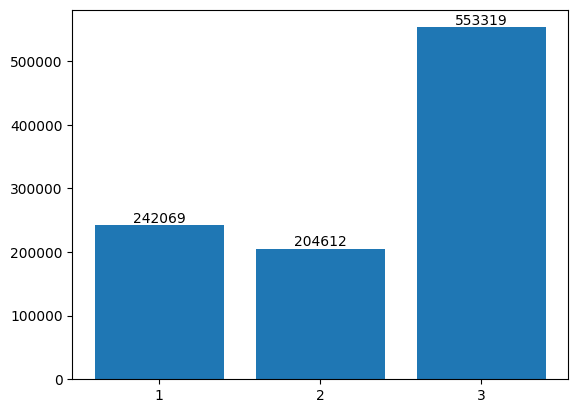

In [232]:
pclass_amounts = [len([y for y in df["pclass"] if y == x]) for x in df["pclass"].unique()]

pclass_bar = plt.bar(df["pclass"].unique(), pclass_amounts)
plt.xticks(df["pclass"].unique(), df["pclass"].unique())
plt.bar_label(pclass_bar, labels=pclass_amounts)

plt.show()

## Feature 2: Sex
This column indicates the passengers' sex, coded as 'female' and 'male'. For the purpose of training the models, this will be converted into numerical values.

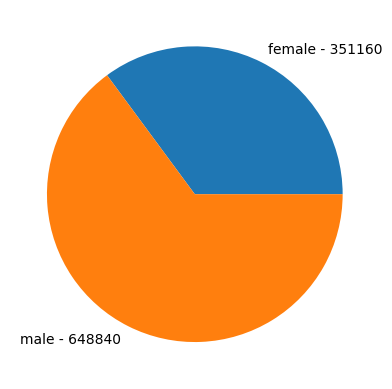

In [233]:
sex_amounts = [len([y for y in df["sex"] if y == x]) for x in df["sex"].unique()]

sex_labels = [df["sex"].unique()[x] + " - " + str(sex_amounts[x]) for x in range(len(df["sex"].unique()))]

sex_pie = plt.pie(sex_amounts, labels=sex_labels)

plt.show()

## Feature 3: Age
The values in this column range from '0' to '101', with at least one passenger listed as being 114 years old. As noted in the general data overview, there are also NaN values in this column. We will begin by checking how many of these are present.

In [234]:
print(f"nulls present: {df['age'].isna().sum()}")

nulls present: 198600


Since we can't substitute a different value for age, we'll remove those rows. As observed during the initial data overview, the 'Age' column contains float values. Since this level of precision isn't necessary, we will convert these to int32. This change shouldn't significantly affect the data but makes more sense given the nature of the input.

In [235]:
df = df.dropna(subset=["age"])

df["age"] = df["age"].astype("int64")
print(f"nulls present: {df['age'].isna().sum()}")

nulls present: 0


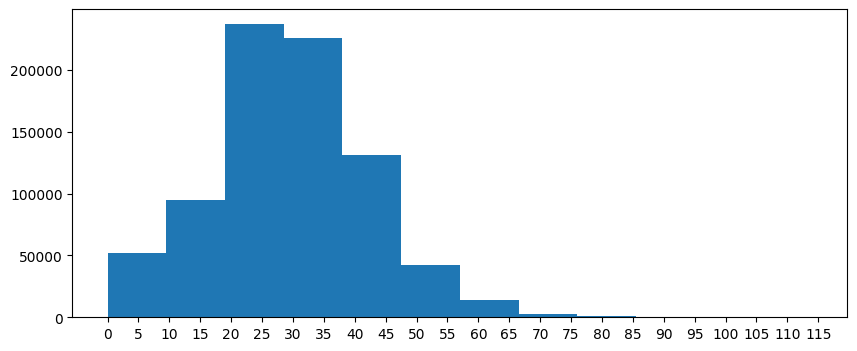

In [236]:
bin_size = 10

plt.figure(figsize=(10,4))
plt.hist(df["age"], bins=math.ceil(df["age"].max()/bin_size))

ticks_array = [x for x in range(0, math.ceil(df["age"].max()/ bin_size) * 10, 5)]

plt.xticks(ticks_array)

plt.show()

Since this data is right-skewed, we'll first check how many rows have values above 70 before removing them to achieve a more balanced dataset.

In [237]:
max_age = 70
amount_above_max_age = len([x for x in df["age"] if x > max_age])
print(f"amount of people above {max_age}: {str(amount_above_max_age)}")
print(f"percentage of people above {max_age} in the dataset: {str(amount_above_max_age/round(len(df['age']), 3))} %")

amount of people above 70: 2020
percentage of people above 70 in the dataset: 0.0025205889693037187 %


Now that we know the number is as small as it appears, we will remove these rows to create a more balanced dataset.

In [238]:
df = df[df["age"] <= max_age]

amount_above_max_age = len([x for x in df["age"] if x > max_age])
print(f"amount of people above {max_age}: {str(amount_above_max_age)}")

amount of people above 70: 0


The graph is recreated for visual clarity.

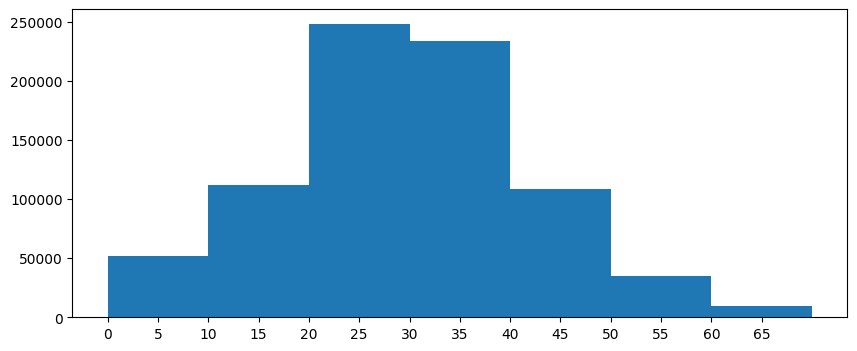

In [239]:
bin_size = 10

plt.figure(figsize=(10,4))
plt.hist(df["age"], bins=math.ceil(df["age"].max()/bin_size))

ticks_array = [x for x in range(0, math.ceil(df["age"].max()/ bin_size) * 10, 5)]

plt.xticks(ticks_array)

plt.show()

## Feature 4: SibSp (Siblings and/or Spouses)
This column represents the number of siblings and/or spouses each passenger had aboard the Titanic. As noted earlier, and as we'll see shortly, there are no values for '6' or '7', though the range spans from '0' to '8'. We will assess whether it is useful to keep the '8' value or not.

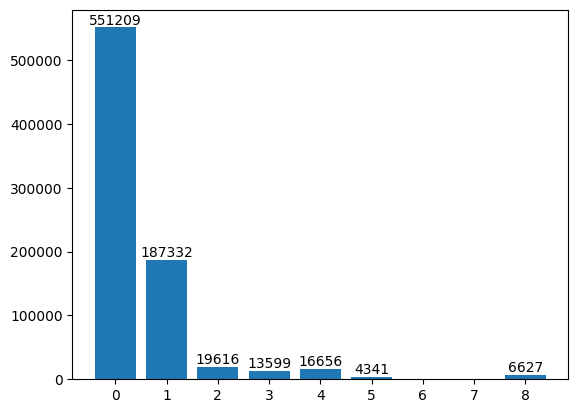

In [240]:
sibsp_sorted_values = df["sibsp"].unique()
sibsp_sorted_values.sort()

sibsp_amounts = [len([y for y in df["sibsp"] if y == x]) for x in sibsp_sorted_values]

sibsp_bar = plt.bar(sibsp_sorted_values, sibsp_amounts)
plt.xticks(range(0,df["sibsp"].max() + 1), range(0,df["sibsp"].max() + 1))
plt.bar_label(sibsp_bar, labels=sibsp_amounts)

plt.show()

As observed, there is minimal data outside of the '0' and '1' columns. To maintain a diverse range of results, we will remove the extreme outliers, specifically '5' and '8'.

In [241]:
max_sibsp = 4
amount_above_max_sibsp = len([x for x in df["sibsp"] if x > max_sibsp])
print(f"Amount of people with more than {max_sibsp} siblings or spouses: {str(amount_above_max_sibsp)}")
print(f"Percentage of people with more than {max_sibsp} siblings or spouses in the dataset: {str(amount_above_max_sibsp/round(len(df['sibsp']), 3))} %")

Amount of people with more than 4 siblings or spouses: 10968
Percentage of people with more than 4 siblings or spouses in the dataset: 0.013720633490955491 %


In [242]:
df = df[df["sibsp"] <= max_sibsp]

In [243]:
amount_above_max_sibsp = len([x for x in df["sibsp"] if x > max_sibsp])
print(f"Amount of people with more than {max_sibsp} siblings or spouses: {str(amount_above_max_sibsp)}")

Amount of people with more than 4 siblings or spouses: 0


The graph is recreated for visual clarity.

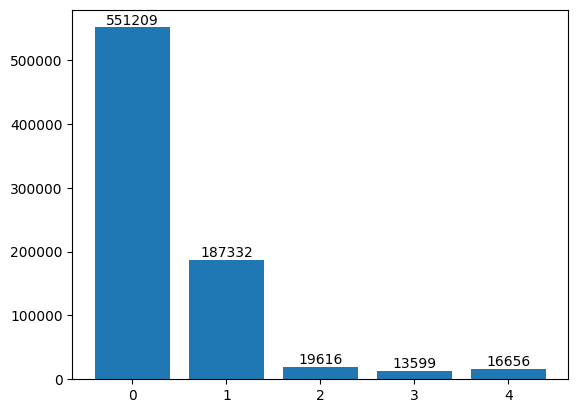

In [244]:
sibsp_sorted_values = df["sibsp"].unique()
sibsp_sorted_values.sort()

sibsp_amounts = [len([y for y in df["sibsp"] if y == x]) for x in sibsp_sorted_values]

sibsp_bar = plt.bar(sibsp_sorted_values, sibsp_amounts)
plt.xticks(range(0,df["sibsp"].max() + 1), range(0,df["sibsp"].max() + 1))
plt.bar_label(sibsp_bar, labels=sibsp_amounts)

plt.show()

## Feature 5: Parch (Parents and/or children)
This column represents the number of parents and/or children each passenger aboard the Titanic had.

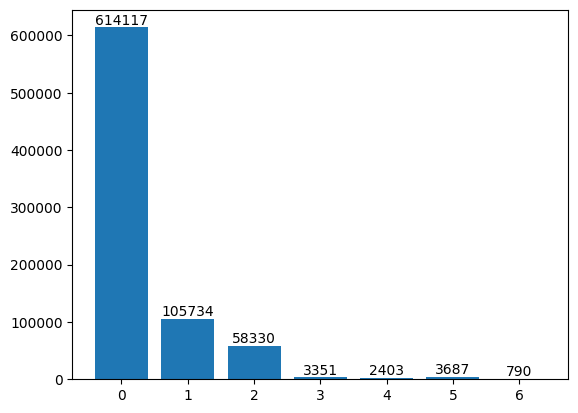

In [245]:
parch_sorted_values = df["parch"].unique()
parch_sorted_values.sort()

parch_amounts = [len([y for y in df["parch"] if y == x]) for x in parch_sorted_values]

parch_bar = plt.bar(parch_sorted_values, parch_amounts)
plt.xticks(range(0,df["parch"].max() + 1), range(0,df["parch"].max() + 1))
plt.bar_label(parch_bar, labels=parch_amounts)

plt.show()

As observed above, the values starting from '3' do not contribute much to the dataset. To maintain the relevance of this column, we will remove all values from '3' onwards.

In [ ]:
max_parch = 2
amount_above_max_parch = len([x for x in df["parch"] if x > max_sibsp])
print(f"Amount of people with more than {max_sibsp} parents or children: {str(amount_above_max_sibsp)}")
print(f"Percentage of people with more than {max_sibsp} parents or children in the dataset: {str(amount_above_max_sibsp/round(len(df['parch']), 3))} %")

Amount of people with more than 4 parents or children: 0
Percentage of people with more than 4 parents or children in the dataset: 0.0 %


In [247]:
df = df[df["parch"] <= max_parch]

In [248]:
amount_above_max_parch = len([x for x in df["parch"] if x > max_sibsp])
print(f"Amount of people with more than {max_sibsp} parents or children: {str(amount_above_max_sibsp)}")

Amount of people with more than 4 parents or children: 0


The graph is recreated for visual clarity.

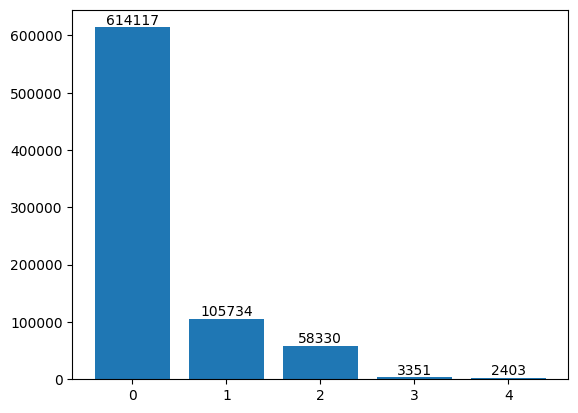

In [249]:
parch_sorted_values = df["parch"].unique()
parch_sorted_values.sort()

parch_amounts = [len([y for y in df["parch"] if y == x]) for x in parch_sorted_values]

parch_bar = plt.bar(parch_sorted_values, parch_amounts)
plt.xticks(range(0,df["parch"].max() + 1), range(0,df["parch"].max() + 1))
plt.bar_label(parch_bar, labels=parch_amounts)

plt.show()

## Feature 6: Fare
This column records the fares paid for boarding the Titanic. These are continuous values, which will be visualized using a boxplot.

640.8836138220682


<Axes: >

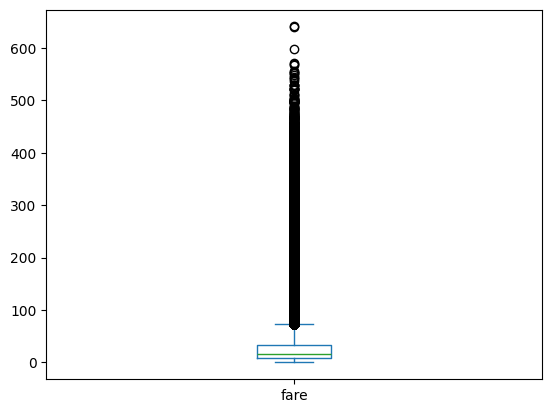

In [250]:
print(df["fare"].max())
df["fare"].plot.box()

As shown in the boxplot, there are many points that could be considered outliers. We will examine how many there are and determine whether it's worthwhile to remove them.

In [251]:
max_fare = 37
amount_above_max_fare = len([x for x in df["fare"] if x > max_fare])
print(f"Amount above {max_fare}: {str(amount_above_max_fare)}")
print(f"Percentage of dataset with fares higher than {max_fare}: {round(amount_above_max_fare/len(df['fare']), 3)} %")

Amount above 37: 181743
Percentage of dataset with fares higher than 37: 0.232 %


Since the percentage of the dataset identified as outliers is very small, we will remove these rows to create a more balanced dataset.

In [252]:
df = df[df["fare"] < max_fare]

amount_above_max_fare = len([x for x in df["fare"] if x > max_fare])
print(f"Amount above {max_fare}: {str(amount_above_max_fare)}")

Amount above 37: 0


The graph is recreated for visual clarity.

<Axes: >

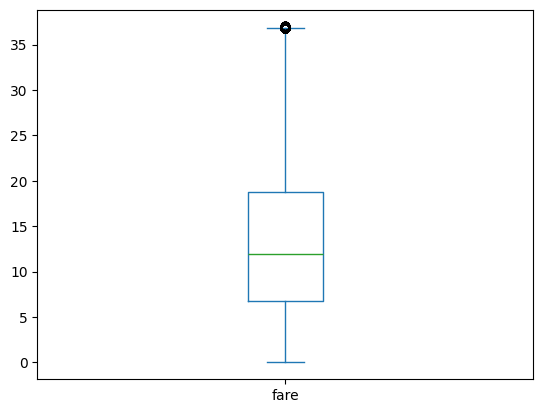

In [253]:
df["fare"].plot.box()

## Feature 7: Embarked
This column contains categorical values representing the ports from which passengers embarked on the Titanic. These values will be encoded for model training purposes.

As noted earlier, there are null values in this column. Since there's no meaningful way to impute these values without significantly affecting the dataset, we will remove the rows containing them.

In [254]:
df = df.dropna(subset=["embarked"])

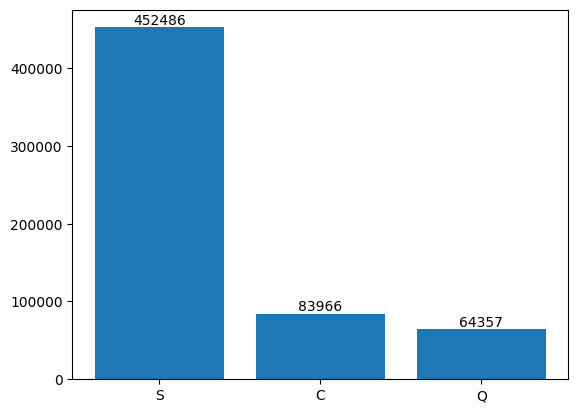

In [255]:
embarked_amounts = [len([y for y in df["embarked"] if y == x]) for x in df["embarked"].unique()]

embarked_bar = plt.bar(df["embarked"].unique(), embarked_amounts)
plt.bar_label(embarked_bar, labels=embarked_amounts)

plt.show()

## To predict: Survived
This column indicates whether a passenger survived or not. The values are coded as '0' for those who died in the tragedy and '1' for those who survived. This is the target column we aim to predict as accurately as possible.

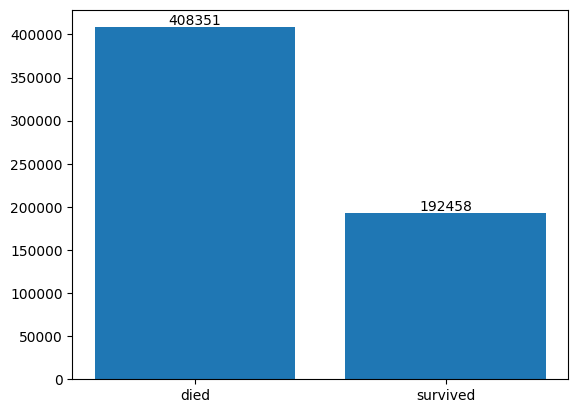

In [256]:
survived_amounts = [len([y for y in df["survived"] if y == x]) for x in df["survived"].unique()]

survived_labels = ["died" if x == 0 else "survived" for x in df["survived"].unique()]

survived_bar = plt.bar(df["survived"].unique(), survived_amounts)
plt.xticks(range(len(survived_labels)), survived_labels)
plt.bar_label(survived_bar, labels=survived_amounts)

plt.show()